## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import requests
import datetime
#from datetime import datetime
import time

## Read 

In [2]:
stock_df = pd.read_csv('list.csv', index_col='date')
stock_df.head()

,A,AA,AACG,AAIC,AAL,AAMC,AAME,AAOI,AAON,AAP,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,88.353264,16.29,1.44,5.79,28.693960,13.47,1.86,14.23,53.459156,148.32083,...,59.31,1.400,22.860252,137.53767,32.28,15.78,1.72,45.10,5.57,10.42
2020-01-24,87.549780,15.51,1.36,5.79,27.538230,13.20,1.90,13.96,53.111374,140.34659,...,57.80,1.340,22.365656,135.51944,32.10,15.45,1.66,47.42,5.38,10.12
2020-01-27,85.863464,14.87,1.31,5.76,26.013866,13.36,1.80,13.26,53.061695,137.75127,...,56.04,1.300,21.969978,135.17150,31.93,15.01,1.63,44.10,5.22,9.94
2020-01-28,86.478485,14.71,1.26,5.77,26.800957,13.34,1.95,12.94,53.349850,137.27579,...,56.50,1.300,22.029331,137.45815,32.39,15.06,1.59,43.54,5.20,10.50
2020-01-29,86.537994,14.50,1.16,5.76,26.701324,13.33,2.02,11.93,53.270363,137.24606,...,57.13,1.293,22.177710,137.70667,32.45,14.85,1.69,47.26,5.01,9.91


In [3]:
stock_df.describe()

,A,AA,AACG,AAIC,AAL,AAMC,AAME,AAOI,AAON,AAP,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.0000,253.000000,253.000000,253.000000,253.000000
mean,94.263543,13.613979,1.092923,3.311304,14.605915,18.543202,2.053259,10.059130,56.757613,140.760026,...,115.444625,0.877834,30.234288,145.850757,28.131344,11.7400,3.300909,40.002925,4.085178,15.845810
std,15.734036,4.951431,0.186846,1.104301,4.832078,3.996858,0.236578,2.030343,6.669117,19.574545,...,46.596266,0.371420,4.194411,16.926644,6.511496,1.9801,1.331612,7.394578,0.768957,4.230359
min,62.860070,5.480000,0.670000,1.700000,9.040000,10.560000,1.590000,5.500000,41.008540,74.533844,...,39.500000,0.336000,21.485273,92.122604,14.520000,7.1900,1.110000,24.280000,2.900000,9.160000
25%,82.500750,10.930000,0.960000,2.710000,11.740000,14.500000,1.870000,8.500000,52.783463,132.597340,...,67.080000,0.613000,27.820000,133.776980,23.860000,10.3100,1.820000,34.920000,3.570000,13.320000
50%,94.972725,13.060000,1.120000,2.850000,13.050000,18.990000,2.060000,9.960000,57.107105,146.365460,...,122.890000,0.810000,29.890000,144.704330,27.650000,11.6500,3.610000,38.560000,3.810000,14.600000
75%,105.247400,15.550000,1.190000,3.690000,15.890000,22.390000,2.190000,11.290000,61.504562,154.689030,...,143.450000,0.990000,33.240000,160.810780,32.290000,12.9700,4.300000,45.350000,4.450000,18.510000
max,128.150000,25.230000,1.710000,6.690000,30.470000,28.580000,2.770000,16.360000,71.700000,176.670000,...,214.760000,1.820000,38.640000,174.080220,45.000000,16.1700,6.790000,56.810000,6.540000,28.580000


In [4]:
stock_df.index = pd.to_datetime(stock_df.index)

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-23 to 2021-01-22
Columns: 4638 entries, A to ZYXI
dtypes: float64(4638)
memory usage: 9.0 MB


<AxesSubplot:xlabel='date'>

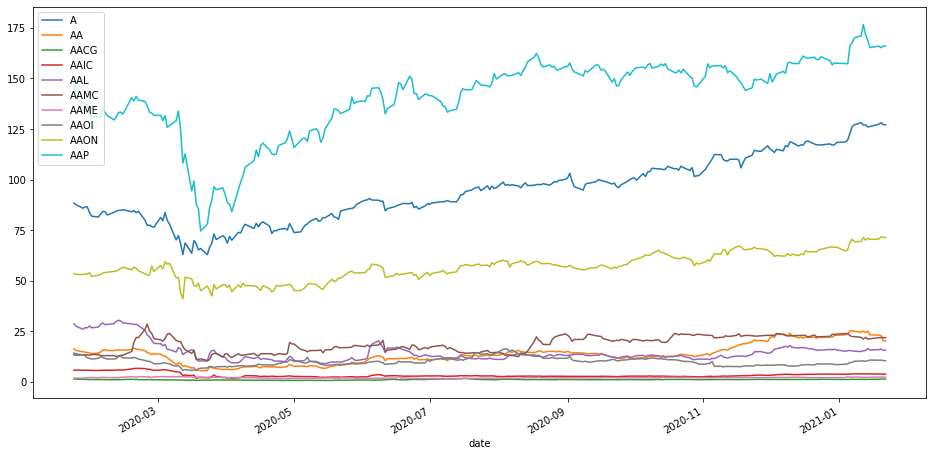

In [6]:
stock_df[['A', 'AA', 'AACG', 'AAIC', 'AAL', 'AAMC', 'AAME', 'AAOI', 'AAON', 'AAP']].plot(figsize=(16,8))

<AxesSubplot:xlabel='date'>

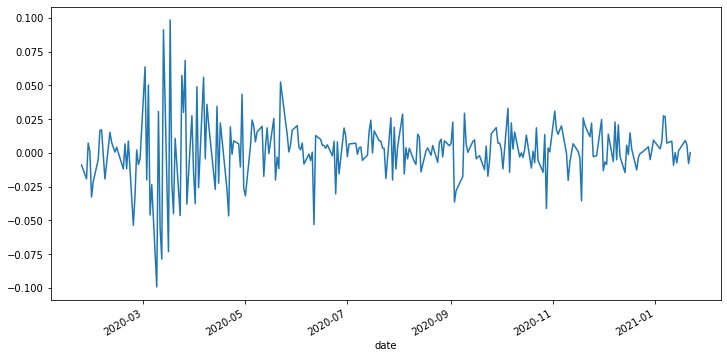

In [7]:
#A = df[['A']]
A = pd.DataFrame(stock_df.loc[:,'A'])
A['Percent Change'] = stock_df['A'].pct_change()
A['Percent Change'].plot(figsize=(12,6))

In [8]:
stock_return = A['Percent Change'].sum() * 100
stock_return

43.107510348906494

In [9]:
index_name = '^GSPC' # S&P 500

In [10]:
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()

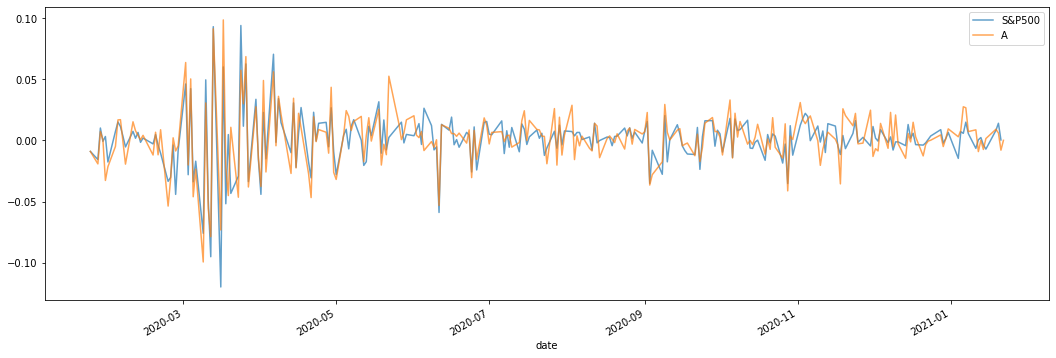

In [11]:
index_df = pdr.get_data_yahoo(index_name, start=start_date, end=end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = index_df['Percent Change'].sum() * 100

index_df['Percent Change'].plot(label='S&P500', figsize=(18,6), alpha=0.7)
A['Percent Change'].plot(label='A', alpha=0.7)
plt.legend()

In [12]:
final = []
index = []
n = -1

In [13]:
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])

In [14]:
#stocklist = stock_df.iloc[:,0:30].columns.to_list()
stocklist = stock_df.columns.to_list()
len(stocklist)

4638

In [16]:
start_time = datetime.datetime.now().strftime("%H:%M:%S")

for stock in stocklist:
    
    n += 1
    #time.sleep(1)
    
    print ("\npulling {} with index {}".format(stock, n))
    
    df = pd.DataFrame(stock_df[stock])
    df.columns = ['Adj Close']
    
    df['Percent Change'] = df['Adj Close'].pct_change()    
    stock_return = df['Percent Change'].sum() * 100
   
    RS_Rating = round((stock_return / index_return) * 10, 2)
#    print(stock, stock_return, index_return, RS_Rating)
    
    try:
        sma = [50, 150, 200]
        for x in sma:
            df["SMA_"+str(x)] = round(df.iloc[:,0].rolling(window=x).mean(), 2)
#        print(df)

        currentClose = df["Adj Close"][-1]
#        print('Current close: ', currentClose)
        moving_average_50 = df["SMA_50"][-1]
#        print('50d MA: ', moving_average_50)
        moving_average_150 = df["SMA_150"][-1]
#        print('150d MA: ', moving_average_150)
        moving_average_200 = df["SMA_200"][-1]
#        print('200d MA: ', moving_average_200)
        low_of_52week = min(df["Adj Close"][-260:])
#        print('Low last 52w: ', low_of_52week)
        high_of_52week = max(df["Adj Close"][-260:])
#        print('High last 52w: ', high_of_52week)
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
#            print(moving_average_200_20)

        except Exception:
            moving_average_200_20 = 0
#
        # Condition 1: Current Price > 150 SMA and > 200 SMA
        if(currentClose > moving_average_150 > moving_average_200):
            #print("Condition 1 met")
            condition_1 = True
        else:
            #print("Condition 1 not met")
            condition_1 = False
        # Condition 2: 150 SMA and > 200 SMA
        if(moving_average_150 > moving_average_200):
            #print("Condition 2 met")
            condition_2 = True
        else:
            #print("Condition 2 not met")
            condition_2 = False
        # Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
        if(moving_average_200 > moving_average_200_20):
            #print("Condition 3 met")
            condition_3 = True
        else:
            #print("Condition 3 not met")
            condition_3 = False
        # Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
        if(moving_average_50 > moving_average_150 > moving_average_200):
            #print("Condition 4 met")
            condition_4 = True
        else:
            #print("Condition 4 not met")
            condition_4 = False
        # Condition 5: Current Price > 50 SMA
        if(currentClose > moving_average_50):
            #print("Condition 5 met")
            condition_5 = True
        else:
            #print("Condition 5 not met")
            condition_5 = False
        # Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
        if(currentClose >= (1.3*low_of_52week)):
            #print("Condition 6 met")
            condition_6 = True
        else:
            #print("Condition 6 not met")
            condition_6 = False
        # Condition 7: Current Price is within 25% of 52 week high
        if(currentClose >= (.75*high_of_52week)):
            #print("Condition 7 met")
            condition_7 = True
        else:
            #print("Condition 7 not met")
            condition_7 = False
            
        # Condition 8: IBD RS_Rating greater than 70
        if(RS_Rating >= 70):
            #print("Condition 8 met")
            condition_8 = True
        else:
            #print("Condition 8 not met")
            condition_8 = False

        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7 and condition_8):
            final.append(stock)
            index.append(n)
            
            dataframe = pd.DataFrame(list(zip(final, index)), columns =['Company', 'Index'])
            
            dataframe.to_csv('stocks.csv')
            
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,"50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True)
            #print (stock + " made the requirements")
        #else:
            #print(stock + " NOT made the requirements")
    except Exception as e:
        print (e)
        print("No data on "+stock)

print(exportList)

writer = ExcelWriter("ScreenOutput.xlsx")
exportList.to_excel(writer, "Sheet1")
writer.save()

end_time = datetime.datetime.now().strftime("%H:%M:%S")
print('inizio: ', start_time, ' fine: ', end_time)


pulling A with index 0

pulling AA with index 1

pulling AACG with index 2

pulling AAIC with index 3

pulling AAL with index 4

pulling AAMC with index 5

pulling AAME with index 6

pulling AAOI with index 7

pulling AAON with index 8

pulling AAP with index 9

pulling AAPL with index 10

pulling AAU with index 11

pulling AAWW with index 12

pulling AAXN with index 13

pulling ABB with index 14

pulling ABBV with index 15

pulling ABC with index 16

pulling ABCB with index 17

pulling ABEO with index 18

pulling ABEV with index 19

pulling ABG with index 20

pulling ABIO with index 21

pulling ABM with index 22

pulling ABMD with index 23

pulling ABR-PA with index 24

pulling ABR-PB with index 25

pulling ABR-PC with index 26

pulling ABR with index 27

pulling ABT with index 28

pulling ABTX with index 29

pulling ABUS with index 30

pulling AC with index 31

pulling ACA with index 32

pulling ACAD with index 33

pulling ACAM with index 34

pulling ACB with index 35

pulling ACBI 

In [ ]:
pd.DataFrame(df.iloc[:,0])

In [30]:
stock_df[list(exportList['Stock'])].

,ACRS,AEYE,AGE,AIHS,ALPN,ALTM,AMRS,AMSC,AMTX,APPN,...,XELA,XPEL,XTLB,YCBD,YRCW,YTEN,ZDGE,ZG,ZS,ZVO
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,1.600,5.3000,1.8600,0.638,3.23,42.6000,2.91,7.32,0.8700,48.545,...,0.4211,17.05,1.36,1.140,2.37,6.25,1.620,47.920,59.31,1.72
2020-01-24,1.570,5.1300,1.7800,0.540,3.28,41.2000,2.84,7.87,0.8410,48.650,...,0.4025,16.85,1.31,1.070,2.21,6.77,1.643,48.070,57.80,1.66
2020-01-27,1.470,4.8300,1.7100,0.548,2.90,42.2000,2.62,7.56,0.8000,47.820,...,0.4435,15.85,1.36,1.110,2.14,6.95,1.630,47.010,56.04,1.63
2020-01-28,1.430,4.7100,1.7100,0.590,2.90,44.0000,2.69,7.17,0.9250,49.810,...,0.4220,16.24,1.36,1.100,2.26,6.96,1.682,47.120,56.50,1.59
2020-01-29,1.360,4.8500,1.5700,0.592,2.98,41.0000,2.60,6.90,0.8700,50.770,...,0.3961,16.26,1.48,1.050,2.32,6.91,1.661,47.730,57.13,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,5.880,23.8600,1.8400,1.320,13.16,51.9100,11.29,23.76,3.6200,169.700,...,0.8280,55.34,3.83,3.940,5.19,13.71,6.980,143.900,211.06,5.41
2021-01-19,18.830,25.3500,1.8800,1.290,13.11,52.0100,11.35,25.02,4.1000,182.910,...,1.0400,50.16,3.67,3.750,5.41,11.55,7.320,149.980,212.00,5.41
2021-01-20,17.970,25.5900,1.9000,1.290,13.29,49.9900,10.70,26.28,3.9500,182.350,...,1.0700,52.53,3.70,3.910,5.39,12.80,7.690,156.640,214.76,5.20


In [65]:
type(list(exportList['Stock']))

list

In [61]:
exportList.loc[81]
#exportList.drop(exportList['FIT'], axis=0)
#tmp_exportList

AttributeError: __delitem__

In [48]:
list(exportList['Stock'])

['ACRS',
 'AEYE',
 'AGE',
 'AIHS',
 'ALPN',
 'ALTM',
 'AMRS',
 'AMSC',
 'AMTX',
 'APPN',
 'APPS',
 'APWC',
 'AQB',
 'AQMS',
 'AR',
 'AREC',
 'ATOM',
 'AVGR',
 'AWH',
 'AZRE',
 'BCRX',
 'BDR',
 'BE',
 'BEAM',
 'BGFV',
 'BGI',
 'BILI',
 'BLDP',
 'BLNK',
 'BNGO',
 'BNTX',
 'BRN',
 'BRPA',
 'BWEN',
 'BWMX',
 'BXC',
 'CALX',
 'CBLI',
 'CDNA',
 'CELH',
 'CHWY',
 'CLIR',
 'CLNE',
 'CLPT',
 'CMBM',
 'CMRX',
 'CMT',
 'CNET',
 'COCP',
 'COGT',
 'CPSH',
 'CPST',
 'CRIS',
 'CRNC',
 'CRWD',
 'CTRA',
 'CVNA',
 'CYH',
 'CYRX',
 'DAC',
 'DDD',
 'DKNG',
 'DMTK',
 'DQ',
 'DRIO',
 'DXYN',
 'ECOR',
 'EH',
 'EKSO',
 'ELA',
 'EMAN',
 'ENG',
 'ENPH',
 'ETSY',
 'EVGN',
 'EVLO',
 'EXPI',
 'FATE',
 'FBRX',
 'FCEL',
 'FENG',
 'FIT',
 'FLGT',
 'FRSX',
 'FSLY',
 'FTCH',
 'FTEK',
 'FUTU',
 'FUV',
 'FVRR',
 'GBR',
 'GEVO',
 'GME',
 'GOGO',
 'GRVY',
 'GRWG',
 'GSAT',
 'GSM',
 'GTEC',
 'HGSH',
 'HOME',
 'HUSN',
 'HZN',
 'ICLK',
 'IDEX',
 'IDRA',
 'IEA',
 'IGMS',
 'IMAB',
 'INMB',
 'INOD',
 'INTZ',
 'INUV',
 'IPWR',
 '

In [43]:
screen_df = stock_df[tmp_exportList]

AttributeError: 'NoneType' object has no attribute 'list'

In [66]:
stock_df[0:80].plot(figsize=(16,8))
#screen_df.plot(figsize=(16,8))
#plt

<module 'matplotlib.pyplot' from 'c:\\users\\edoardo\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

ValueError: Image size of 951x69592 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x576 with 1 Axes>

In [26]:
list(exportList['Stock'])

['ACRS',
 'AEYE',
 'AGE',
 'AIHS',
 'ALPN',
 'ALTM',
 'AMRS',
 'AMSC',
 'AMTX',
 'APPN',
 'APPS',
 'APWC',
 'AQB',
 'AQMS',
 'AR',
 'AREC',
 'ATOM',
 'AVGR',
 'AWH',
 'AZRE',
 'BCRX',
 'BDR',
 'BE',
 'BEAM',
 'BGFV',
 'BGI',
 'BILI',
 'BLDP',
 'BLNK',
 'BNGO',
 'BNTX',
 'BRN',
 'BRPA',
 'BWEN',
 'BWMX',
 'BXC',
 'CALX',
 'CBLI',
 'CDNA',
 'CELH',
 'CHWY',
 'CLIR',
 'CLNE',
 'CLPT',
 'CMBM',
 'CMRX',
 'CMT',
 'CNET',
 'COCP',
 'COGT',
 'CPSH',
 'CPST',
 'CRIS',
 'CRNC',
 'CRWD',
 'CTRA',
 'CVNA',
 'CYH',
 'CYRX',
 'DAC',
 'DDD',
 'DKNG',
 'DMTK',
 'DQ',
 'DRIO',
 'DXYN',
 'ECOR',
 'EH',
 'EKSO',
 'ELA',
 'EMAN',
 'ENG',
 'ENPH',
 'ETSY',
 'EVGN',
 'EVLO',
 'EXPI',
 'FATE',
 'FBRX',
 'FCEL',
 'FENG',
 'FIT',
 'FLGT',
 'FRSX',
 'FSLY',
 'FTCH',
 'FTEK',
 'FUTU',
 'FUV',
 'FVRR',
 'GBR',
 'GEVO',
 'GME',
 'GOGO',
 'GRVY',
 'GRWG',
 'GSAT',
 'GSM',
 'GTEC',
 'HGSH',
 'HOME',
 'HUSN',
 'HZN',
 'ICLK',
 'IDEX',
 'IDRA',
 'IEA',
 'IGMS',
 'IMAB',
 'INMB',
 'INOD',
 'INTZ',
 'INUV',
 'IPWR',
 '

In [21]:
dataframe

,Company,Index
0,ACRS,56
1,AEYE,99
2,AGE,111
3,AIHS,139
4,ALPN,191
...,...,...
254,YTEN,4602
255,ZDGE,4613
256,ZG,4617
257,ZS,4628
